## K-Nearest Neighbors Classification in Python using Scikit-Learn
 
This program is a simple example to demonstrate how to apply a classification model using K-Nearest Neighbors algorithm. The goal is to predict two possible classes of customers, they that will purchase or not a SUV model.

**Dataset Description**

The dataset is composed by 3 columns and 400 rows. The feature (columns) are Age, Estimated Salary and Purchases (target variable 0 or 1). Each row represents one customer.

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values # Independent Variables
y = dataset.iloc[:, -1].values # Dependent Variable

In [3]:
dataset.shape

(400, 3)

In [4]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Splitting the dataset into Training and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Building the Model - K-Nearest Neighbors

KNN is a non-linear model very simple to understand and employ it. When we have a set of points that can be divided  by classes, if we want to know which class a new data point will be inserted, we chose a number $k$ of neighbors near to the new data point and we count the number of points in each category. For example, if we have two classes 1 and 2, the new data point have three neighbors class 1 and two neighbors class 2, the algorithm will classify this new data point into the class 1. The distance between the point can be made in many ways, it’s depends on  chosen metric. In almost all cases we utilize the Minkowski’s metric that uses Euclidean distance or Manhattan distance.

Here we utilize Neighbors class and we call the object KneighborsClassifier. The n_neighbors is 5, the chosen metric is Minkowski and p = 2 is a standard Euclidean distance (p = 1 - Manhattan distance).

In [7]:
from sklearn.neighbors import KNeighborsClassifier # Class and object
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Creating the object

### Training the model

In [8]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Making a single prediction

In [9]:
print(classifier.predict(sc.transform([[30, 80000]]))) # We must to apply the feature scaling

[0]


### Predicting new results

In [10]:
y_pred = classifier.predict(X_test)

### Metrics (accuracy and confusion matrix)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf_mat = confusion_matrix(y_test, y_pred) # Creating the confusion matrix
print(conf_mat)
print(accuracy_score(y_test, y_pred))

[[54  4]
 [ 1 21]]
0.9375


### Visualizing the results

#### Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


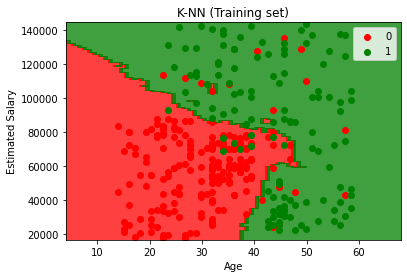

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


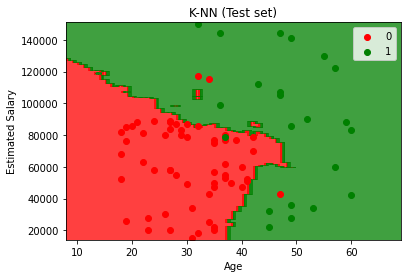

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Conclusion

Here we had demonstrated  a simple example of KNN model. This non-linear model present a good accuracy. Due to the non-linearity of this problem we can visualize in the graphic two distinct regions. Green to 1 and red to 0, the line that divides is not linear, for this reason we can see more easily the relation between salary and purchase.